# Football Match Predictor - EDA and Data Cleaning

## Library Imports

In [1]:
# Add all the library imports required
import pandas as pd
import numpy as np
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set()

In [2]:
if  not os.path.exists('./imgs'):
    os.makedirs('./imgs')

## Download the data

In [3]:
if not os.path.exists('./Football-Dataset.zip'):
    !wget "https://aicore-files.s3.amazonaws.com/Data-Science/Football-Dataset.zip"

In [4]:
def import_league(league_name, df=None):
    if df is None:
        df = pd.DataFrame()
    years = list(range(1990,2022))
    
    for year in years:
        with ZipFile("Football-Dataset.zip") as myzip:
            data = myzip.open(f"Football-Dataset/{league_name}/Results_{year}_{league_name}.csv")
        season = pd.read_csv(data)
        season.columns = season.columns.str.lower()
        df = pd.concat([df, season])
    
    return df


def import_leagues(league_names):
    df = pd.DataFrame()
    for league in league_names:
        df = pd.concat([df, import_league(league)])
    return df

league_names = ["premier_league", "championship", "primera_division", "segunda_division",
                "bundesliga", "2_liga", "serie_a", "serie_b", "ligue_1", "ligue_2", 
                "eredivisie", "eerste_divisie"]

# Import the data into a single dataframe
data_df = import_leagues(league_names)

data_df = (data_df
            .reset_index()
            .drop(columns='index')
            .rename(columns={'season': 'season_year', 'result': 'score', 'round': 'match_round'})
)
data_df.tail() # Check to see if all the data is there

,home_team,away_team,score,link,season_year,match_round,league
129389,SC Telstar,FC Volendam,2-2,https://www.besoccer.com/match/stormvogels-tel...,2021,34,eerste_divisie
129390,Jong Ajax,Roda JC,0-4,https://www.besoccer.com/match/jong-ajax/roda-...,2021,34,eerste_divisie
129391,Dordrecht,Go Ahead Eagles,0-0,https://www.besoccer.com/match/fc-dordrecht/go...,2021,34,eerste_divisie
129392,Almere City,MVV Maastricht,0-0,https://www.besoccer.com/match/almere-city/mvv...,2021,34,eerste_divisie
129393,De Graafschap,Den Bosch,4-2,https://www.besoccer.com/match/graafschap/fc-d...,2021,34,eerste_divisie


### Check for duplicates

In [5]:
(data_df
    [data_df.duplicated(subset=['home_team', 'away_team', 'season_year'], keep='first')]
    .groupby(['league', 'season_year'], as_index=False)
    .agg(num_duplicates = ('score', 'count')))

,league,season_year,num_duplicates
0,eerste_divisie,1997,297
1,eerste_divisie,1998,297
2,eerste_divisie,1999,297
3,eerste_divisie,2000,297
4,eerste_divisie,2001,297
5,eerste_divisie,2002,297
6,eerste_divisie,2003,297
7,eerste_divisie,2004,333
8,eerste_divisie,2005,333
9,eerste_divisie,2006,370


## Clean the data

In [6]:
# Check that the score attribute contains two numerical values either side of the '-'
# See where this condition is false
data_df[~data_df.score.str.contains('^\d+-\d+$')]

,home_team,away_team,score,link,season_year,match_round,league
12293,Aston Villa,Everton,17 JAN,https://www.besoccer.com/match/aston-villa-fc/...,2021,19,premier_league
86990,Spezia,SSC Bari,3 (3-2) 2,https://www.besoccer.com/match/asd-spezia/as-b...,2013,18,serie_b
86992,Cittadella,Varese,0 (0-1) 1,https://www.besoccer.com/match/as-cittadella/a...,2013,18,serie_b
101927,Strasbourg,PSG,18 MAR,https://www.besoccer.com/match/strasbourg/pari...,2020,28,ligue_1
120300,PEC Zwolle,VVV Venlo,0 (0-0) 0,https://www.besoccer.com/match/fc-zwolle/vvv/2...,2013,15,eredivisie


In [7]:
data_df = data_df.drop_duplicates(subset=['home_team', 'away_team', 'season_year'])
score_idx_to_fix = data_df[~data_df.score.str.contains('^\d+-\d+$')].index.to_list()
data_df.loc[score_idx_to_fix[0],'score'] = '0-0'
data_df.loc[score_idx_to_fix[1],'score'] = '3-2'
data_df.loc[score_idx_to_fix[2],'score'] = '0-1'
# Fourth match postponed due to Covid pandemic so need to remove row
data_df.loc[score_idx_to_fix[4],'score'] = '0-0'

data_df = (data_df
            .drop(score_idx_to_fix[3])
            .reset_index()
            .drop('index', axis=1))
data_df.tail()

,home_team,away_team,score,link,season_year,match_round,league
122614,SC Telstar,FC Volendam,2-2,https://www.besoccer.com/match/stormvogels-tel...,2021,1,eerste_divisie
122615,Jong Ajax,Roda JC,0-4,https://www.besoccer.com/match/jong-ajax/roda-...,2021,1,eerste_divisie
122616,Dordrecht,Go Ahead Eagles,0-0,https://www.besoccer.com/match/fc-dordrecht/go...,2021,1,eerste_divisie
122617,Almere City,MVV Maastricht,0-0,https://www.besoccer.com/match/almere-city/mvv...,2021,1,eerste_divisie
122618,De Graafschap,Den Bosch,4-2,https://www.besoccer.com/match/graafschap/fc-d...,2021,1,eerste_divisie


### Create new features

In [8]:
# Split the home and away goals into separate attributes

def split_home_away_goals(df):
    return (df.join(df.score.str.split('-', expand=True)
        .astype('int')
        .rename(columns={0: 'home_goals', 1: 'away_goals'})))


data_df = (data_df
            .pipe(split_home_away_goals)
            .assign(result = lambda df_: np.select([df_.home_goals > df_.away_goals, df_.home_goals == df_.away_goals], ['home_win', 'draw'], 'away_win'),
                    season_year = lambda df_: df_.season_year.astype('int'),
                    match_round = lambda df_: df_.match_round.astype('int'))
            .assign(result = lambda df_: df_.result.astype('category')))
data_df

,home_team,away_team,score,link,season_year,match_round,league,home_goals,away_goals,result
0,Charlton Athletic,Derby County,0-0,https://www.besoccer.com/match/charlton-athlet...,1990,1,premier_league,0,0,draw
1,Tottenham Hotspur,Luton Town,2-1,https://www.besoccer.com/match/tottenham-hotsp...,1990,1,premier_league,2,1,home_win
2,Southampton,Millwall,1-2,https://www.besoccer.com/match/southampton-fc/...,1990,1,premier_league,1,2,away_win
3,Sheffield Wednesday,Norwich City,0-2,https://www.besoccer.com/match/sheffield-wedne...,1990,1,premier_league,0,2,away_win
4,Queens Park Rangers,Crystal Palace,2-0,https://www.besoccer.com/match/queens-park-ran...,1990,1,premier_league,2,0,home_win
...,...,...,...,...,...,...,...,...,...,...
122614,SC Telstar,FC Volendam,2-2,https://www.besoccer.com/match/stormvogels-tel...,2021,1,eerste_divisie,2,2,draw
122615,Jong Ajax,Roda JC,0-4,https://www.besoccer.com/match/jong-ajax/roda-...,2021,1,eerste_divisie,0,4,away_win
122616,Dordrecht,Go Ahead Eagles,0-0,https://www.besoccer.com/match/fc-dordrecht/go...,2021,1,eerste_divisie,0,0,draw
122617,Almere City,MVV Maastricht,0-0,https://www.besoccer.com/match/almere-city/mvv...,2021,1,eerste_divisie,0,0,draw


In [9]:
data_df.dtypes

home_team        object
away_team        object
score            object
link             object
season_year       int64
match_round       int64
league           object
home_goals        int64
away_goals        int64
result         category
dtype: object

## Find some high level relationships in the data

### Number teams in each league each year

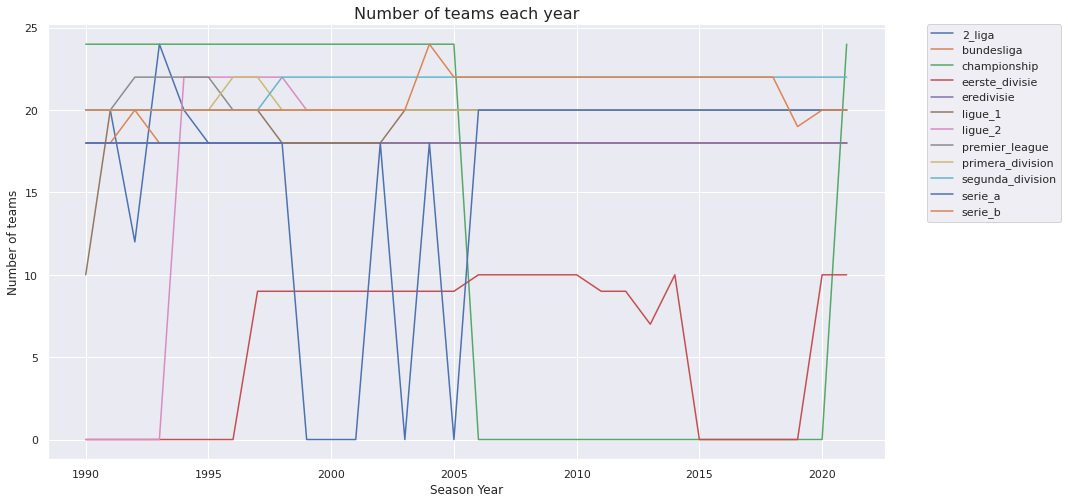

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
(data_df
    .groupby(['league', 'season_year'], as_index=False)
    .agg(num_teams=('home_team', 'nunique'))
    .pivot(index='season_year', columns='league', values='num_teams')
    .fillna(0)
    .plot(ax=ax, ylabel='Number of teams', xlabel='Season Year'))
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Number of teams each year', fontsize=16)

fig.savefig('./imgs/number_of_teams_each_year_plot.png', bbox_extra_artists = (lgd,), bbox_inches='tight')

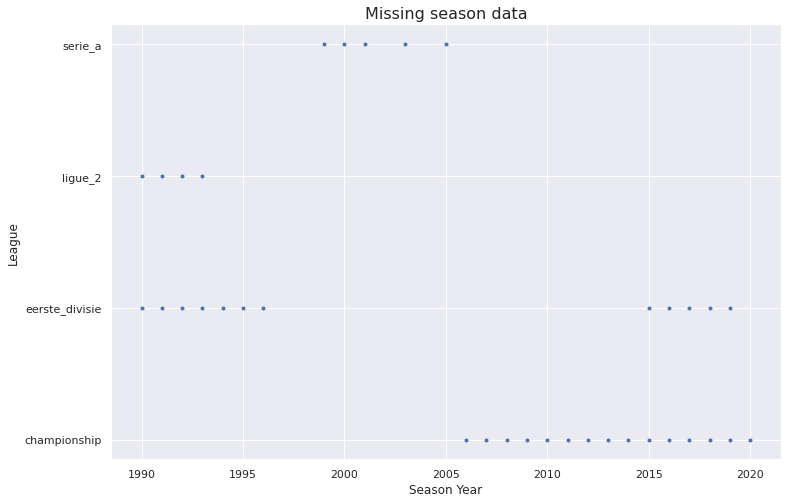

In [11]:
from sklearn.preprocessing import OrdinalEncoder

n_teams_each_year = data_df.groupby(['league', 'season_year'], as_index=False).agg(num_teams=('home_team', 'nunique'))

n_teams_each_year_wide = n_teams_each_year.pivot(index='season_year', columns='league', values='num_teams')

n_teams_each_year_long = (pd.melt(n_teams_each_year_wide.reset_index(), id_vars='season_year')
    .rename(columns = {'value': 'num_teams'}))

missing_data = n_teams_each_year_long[n_teams_each_year_long.num_teams.isna()].drop('num_teams', axis=1)
ord = OrdinalEncoder()

missing_data['encoded_value'] = ord.fit_transform(missing_data.league.values.reshape(-1,1))

fig, ax = plt.subplots(figsize=(12,8))

missing_data.drop('league', axis=1).plot(x = 'season_year', y='encoded_value', marker = '.', linewidth=0, ax=ax, legend=None)

ax.set_yticks(list(range(4)))
ax.set_yticklabels(ord.categories_[0])
ax.set_xlabel('Season Year')
ax.set_ylabel('League')
ax.set_title('Missing season data', fontsize=16);

fig.savefig('./imgs/amount_of_missing_data_plot.png')

Seems to be plenty of missing data!!

### How many matches in each season

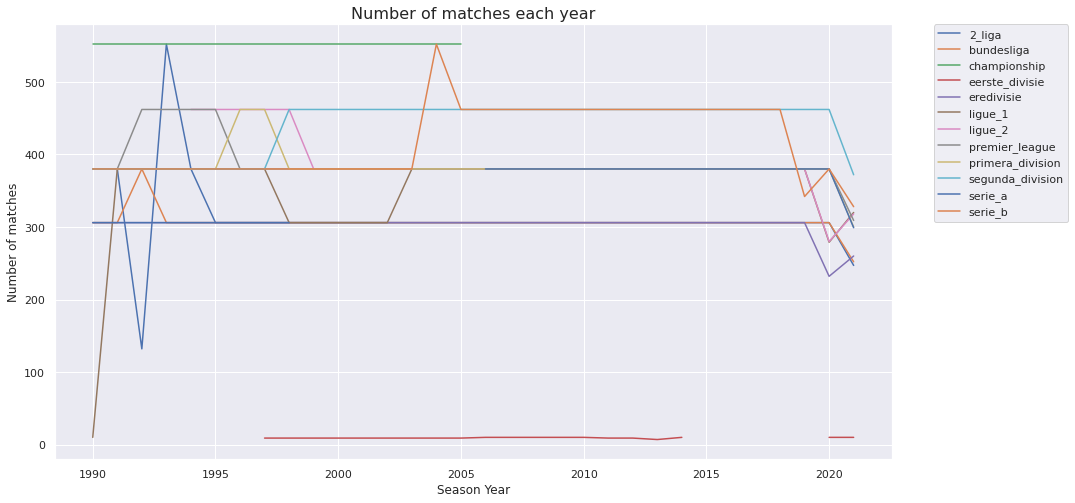

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
(data_df
    .groupby(['league', 'season_year'], as_index=False)
    .agg(num_matches=('match_round', 'count'))
    .pivot(index='season_year', columns='league', values='num_matches')
    .plot(ax=ax, ylabel='Number of matches', xlabel='Season Year'))
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Number of matches each year', fontsize=16);

fig.savefig('./imgs/number_of_matches_each_year.png', bbox_extra_artists = (lgd,), bbox_inches='tight')


There seems to be some missing matches in 2020 due to the pandemic, also the 2021 season hasn't finished yet.

There is also a lot of missing data for eerste_divisie.

### Number of goals per game for each league each year

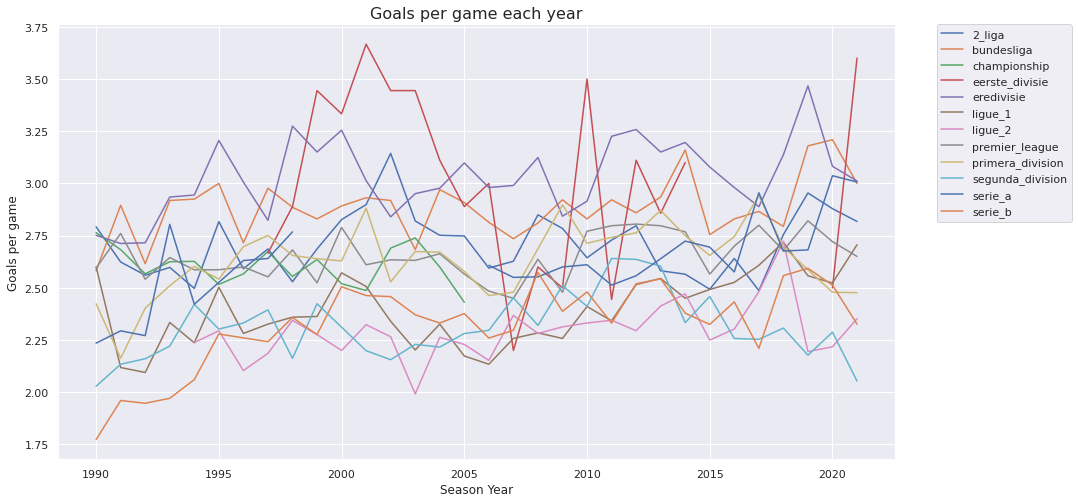

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
(data_df
    .groupby(['league', 'season_year'], as_index=False)
    .agg(total_home_goals = ('home_goals', 'sum'), total_away_goals = ('away_goals', 'sum'), total_matches = ('match_round', 'count'))
    .assign(goals_per_game = lambda df_: (df_.total_home_goals.add(df_.total_away_goals)).div(df_.total_matches))
    .drop(['total_home_goals', 'total_away_goals', 'total_matches'], axis=1)
    .pivot(index='season_year', columns='league', values='goals_per_game')
    .plot(ax= ax, xlabel='Season Year', ylabel='Goals per game')
)
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Goals per game each year', fontsize=16)

fig.savefig('./imgs/number_of_goals_per_game_each_year.png', bbox_extra_artists = (lgd,), bbox_inches='tight');

### Number of goals per game in each league

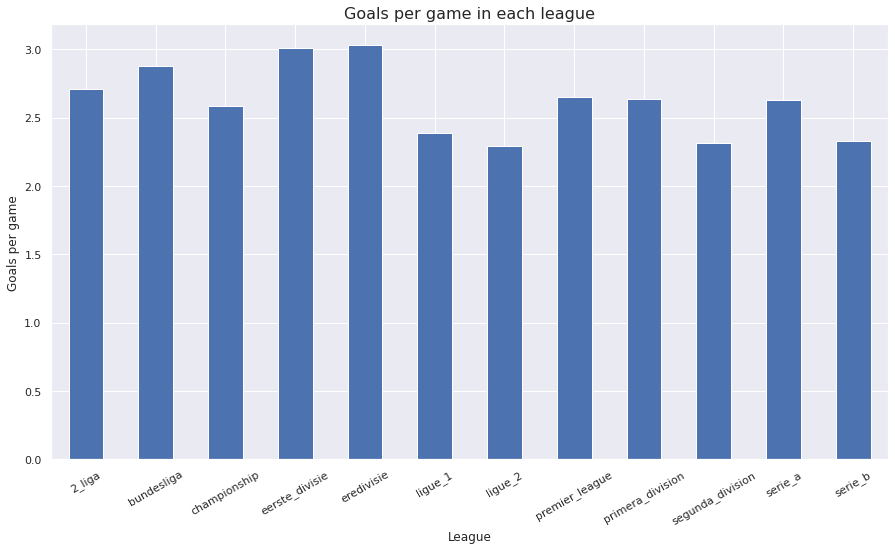

In [14]:
fig, ax = plt.subplots(figsize=(15,8))

(data_df
    .groupby('league')
    .agg(total_home_goals = ('home_goals', 'sum'), total_away_goals = ('away_goals', 'sum'), total_matches = ('match_round', 'count'))
    .assign(goals_per_game = lambda df_: (df_.total_home_goals.add(df_.total_away_goals)).div(df_.total_matches))
    .goals_per_game.plot.bar(ax=ax, xlabel='League', ylabel='Goals per game')
)
ax.set_title('Goals per game in each league', fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

fig.savefig('./imgs/number_of_goals_per_game_in_each_league.png')

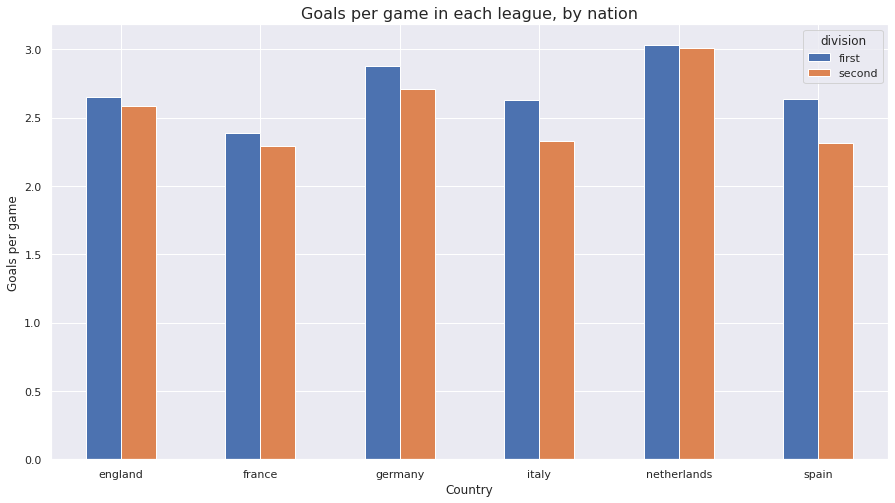

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
(data_df
    .groupby('league', as_index = False)
    .agg(total_home_goals = ('home_goals', 'sum'), total_away_goals = ('away_goals', 'sum'), total_matches = ('match_round', 'count'))
    .assign(goals_per_game = lambda df_: (df_.total_home_goals.add(df_.total_away_goals)).div(df_.total_matches),
            country = ['germany', 'germany', 'england', 'netherlands', 'netherlands', 'france',
                        'france', 'england', 'spain', 'spain', 'italy', 'italy'],
            division = ['second', 'first', 'second', 'second', 'first', 'first', 'second', 'first', 'first', 'second', 'first', 'second'])
    .pivot(index='country', columns='division', values='goals_per_game')
    .plot.bar(ax=ax, xlabel='Country', ylabel = 'Goals per game')
)
ax.set_title('Goals per game in each league, by nation', fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)

fig.savefig('./imgs/number_of_goals_per_game_in_each_league_by_division.png')

Hmm, not much of interest in that statistic, except that the higher division tends to score slightly more goals than the lower division.

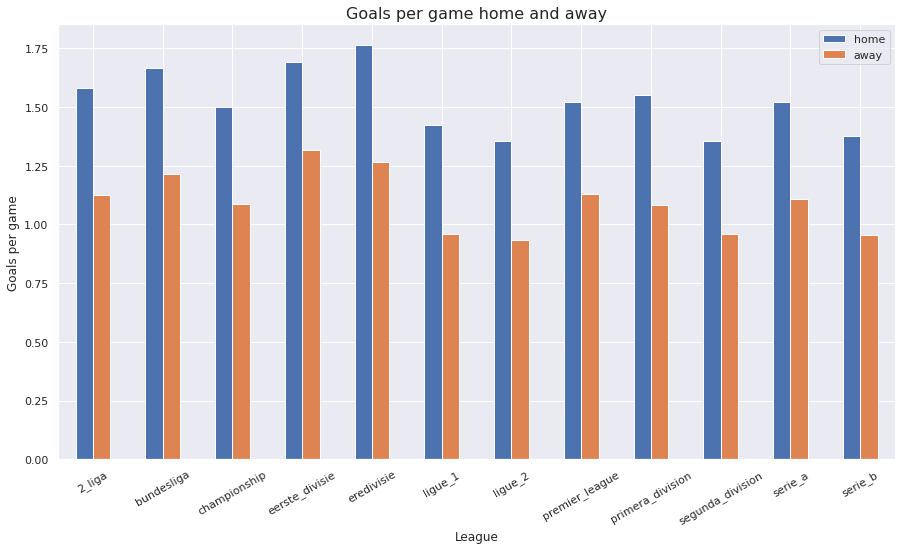

In [16]:
fig, ax = plt.subplots(figsize=(15,8))

(data_df
    .groupby('league')
    .agg(total_home_goals = ('home_goals', 'sum'), total_away_goals = ('away_goals', 'sum'), total_matches = ('match_round', 'count'))
    .assign(home = lambda df_: df_.total_home_goals.div(df_.total_matches),
            away = lambda df_: df_.total_away_goals.div(df_.total_matches))
    .drop(columns = ['total_home_goals', 'total_away_goals', 'total_matches'])
    .plot.bar(ax=ax, xlabel='League', ylabel='Goals per game')
)
ax.set_title('Goals per game home and away', fontsize = 16)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

fig.savefig('./imgs/number_of_goals_per_game_in_each_league_for_home_and_away.png')

Nice, there is an obvious relationship there between home and away goals. The away team scores much less goals than the home team, to be expected though but nonetheless still relevant.

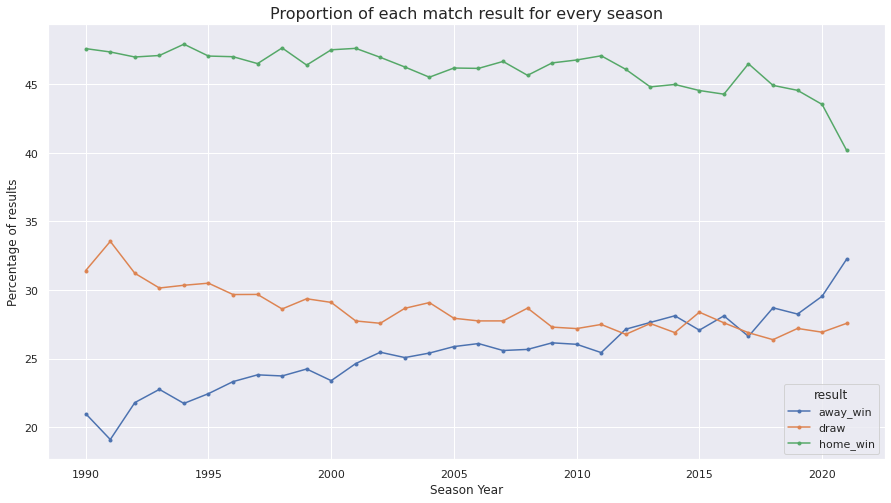

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
(data_df
    .groupby(['season_year', 'result'], as_index=False)
    .agg(matches = ('match_round', 'count'))
    .pivot(index='season_year', columns='result', values='matches')
    .assign(total_matches = lambda df_: df_.away_win.add(df_.draw).add(df_.home_win),
            away_win = lambda df_: df_.away_win.div(df_.total_matches).mul(100),
            draw = lambda df_: df_.draw.div(df_.total_matches).mul(100),
            home_win = lambda df_: df_.home_win.div(df_.total_matches).mul(100))
    .drop(columns='total_matches')
    .plot(ax=ax, marker='.', xlabel='Season Year', ylabel = 'Percentage of results')
)

ax.set_title('Proportion of each match result for every season', fontsize=16)

fig.savefig('./imgs/split_of_results_for_each_year.png')

Not much has changed over the years although the percentage of away wins has steadily increased over the years.

## Download further data

In [18]:
if not os.path.exists('./Match_Info.csv'):
    !wget "https://aicore-files.s3.amazonaws.com/Data-Science/Match_Info.csv"
if not os.path.exists('./Team_Info.csv'):
    !wget "https://aicore-files.s3.amazonaws.com/Data-Science/Team_Info.csv"

In [19]:
match_info = pd.read_csv('Match_Info.csv', na_values=np.nan)
match_info.columns

Index(['Link', 'Date_New', 'Referee', 'Home_Yellow', 'Home_Red', 'Away_Yellow',
       'Away_Red'],
      dtype='object')

In [20]:
match_info.columns = match_info.columns.str.lower()
match_info.tail(10)

,link,date_new,referee,home_yellow,home_red,away_yellow,away_red
143338,/match/watford-fc/crystal-palace-fc/1999,"Saturday, 24 April 1999, 00:00",\r\nReferee: Eddie Lomas\r\n,2.0,0.0,1.0,0.0
143339,/match/stade-rennes/valence/1994,"Wednesday, 25 August 1993, 00:00",\r\nReferee: Michel Salon\r\n,0.0,0.0,0.0,0.0
143340,/match/afc-bournemouth/watford-fc/2021,"Saturday, 27 February 2021, 13:30",\r\nReferee: Harrington T.\r\n,4.0,1.0,6.0,1.0
143341,/match/bolton-wanderers-fc/port-vale/1999,"Wednesday, 04 November 1998, 00:00",\r\nReferee: Graham Frankland\r\n,0.0,0.0,2.0,0.0
143342,/match/estoril/sc-olhanense/2007,"Sunday, 03 December 2006, 17:00",\r\n,4.0,0.0,2.0,0.0
143343,/match/sunderland-afc/oxford-city/1999,"Saturday, 19 September 1998, 00:00",\r\nReferee: Anthony Leake\r\n,1.0,0.0,0.0,0.0
143344,/match/fc-gueugnon/bastia/1994,"Tuesday, 17 May 1994, 00:00",\r\nReferee: Jacques Poulain\r\n,0.0,0.0,0.0,0.0
143345,/match/tranmere-rovers/wolverhampton/1999,"Friday, 08 January 1999, 00:00",\r\nReferee: Kevin Lynch\r\n,2.0,0.0,1.0,0.0
143346,/match/sochaux/guingamp/2021,"Saturday, 27 February 2021, 19:00",\r\nReferee: Baert A.\r\n,0.0,0.0,2.0,0.0
143347,/match/huddersfield-town-fc/crystal-palace-fc/...,"Saturday, 05 December 1998, 00:00",\r\nReferee: George Cain\r\n,1.0,0.0,1.0,0.0


In [21]:
def tweak_match_info(df):
    return (df.rename(columns = dict(zip(df.columns, df.columns.str.lower())))
                .assign(referee = lambda df_: df_.referee.str.extract('\r\nReferee: ([\w -.]+)'),
                    date_new = lambda df_: pd.to_datetime(df_.date_new))
            )
            

match_info_df = tweak_match_info(match_info)

The missing data for yellow and red cards is going to have to be imputed, not sure how useful the referee column is likely to be.

In [22]:
match_info_df.dtypes

link                   object
date_new       datetime64[ns]
referee                object
home_yellow           float64
home_red              float64
away_yellow           float64
away_red              float64
dtype: object

In [23]:
match_info.describe()

,home_yellow,home_red,away_yellow,away_red
count,122798.000000,122798.000000,122798.000000,122798.000000
mean,1.729784,0.067469,2.096997,0.094684
std,1.350435,0.264917,1.440107,0.313102
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,2.000000,0.000000,2.000000,0.000000
75%,3.000000,0.000000,3.000000,0.000000
max,10.000000,3.000000,10.000000,4.000000


In [24]:
team_info = pd.read_csv('Team_Info.csv', na_values=np.nan)
team_info.columns

Index(['Team', 'City', 'Country', 'Stadium', 'Capacity', 'Pitch'], dtype='object')

In [25]:
# team_info.columns = team_info.columns.str.lower()
team_info.head(10)

,Team,City,Country,Stadium,Capacity,Pitch
0,Wattenscheid 09,Bochum-Wattenscheid,Germany,Lohrheidestadion,16233,Natural
1,Hertha BSC,Berlín,Germany,Olympiastadion Berlin,76065,Natural
2,Unterhaching,Unterhaching,Germany,Sportpark Unterhaching,15053,Natural
3,Fortuna Köln,Cologne,Germany,Südstadion,14944,Natural
4,MSV Duisburg,Duisburgo,Germany,Schauinsland-Reisen-Arena,31514,Natural
5,Saarbrücken,Saarbrücken,Germany,Stadion Ludwigspark,35286,Natural
6,Braunschweig,Braunschweig,Germany,Eintracht-Stadion,23325,Natural
7,Hessen Kassel,Hessen,Germany,NaN,"18,737",grass
8,VfL Osnabrück,Osnabrück,Germany,osnatel-ARENA,16130,Césped
9,Meppen,Meppen,Germany,MEP-Arena,16500,Natural


In [26]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Team      544 non-null    object
 1   City      544 non-null    object
 2   Country   544 non-null    object
 3   Stadium   447 non-null    object
 4   Capacity  544 non-null    object
 5   Pitch     447 non-null    object
dtypes: object(6)
memory usage: 25.6+ KB


Some missing stadium and pitch data there, not sure they are needed anyway. The capacity data is all there so that is all that is needed.

In [27]:
def tweak_team_info(df):
    # drop indexes with Portugal
    portugal_idxs = df.query("Country == 'Portugal'").index.to_list()
    
    return (df.rename(columns = dict(zip(df.columns, df.columns.str.lower())))
                .assign(capacity = lambda df_: df_.capacity.str.replace(',','').astype('int'))
                .drop(portugal_idxs)
            )

team_info_df = tweak_team_info(team_info)
team_info_df.pitch.value_counts()

Natural              314
Grass                 28
Césped natural        21
Césped Artificial     16
grass                  8
Césped Natural         6
Césped                 2
Artificial             2
natural                2
cesped natural         1
cesped real            1
NATURAL                1
AirFibr                1
Natural grass          1
Cesped natural         1
natural grass          1
Name: pitch, dtype: int64

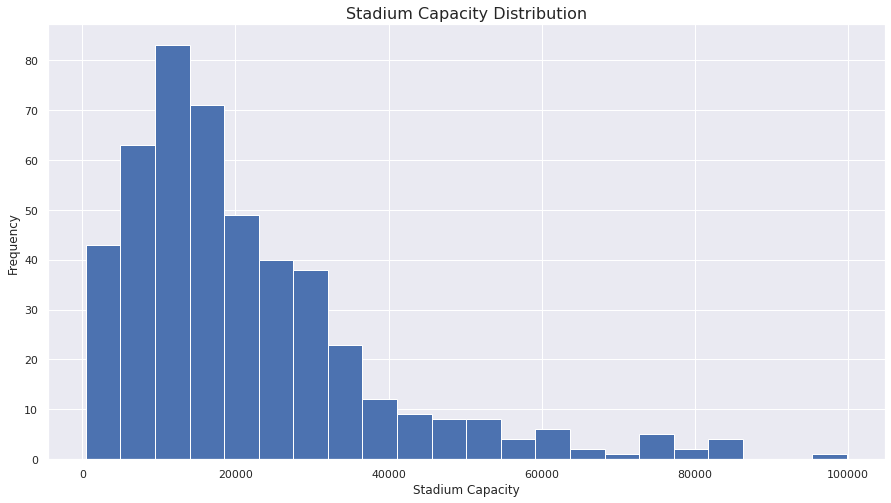

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
team_info_df.capacity.plot.hist(ax=ax, bins=22)
ax.set_xlabel('Stadium Capacity')
ax.set_title('Stadium Capacity Distribution', fontsize=16)
fig.savefig('./imgs/stadium_capacity_distribution.png')